In [1]:
import xarray as xr
from collections import namedtuple
import numpy as np
import pandas as pd
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import geopandas
import geoplot as gplt

In [6]:
ds = xr.open_dataset('data/Wheat.Winter.crop.calendar.nc')
ds

<xarray.Dataset>
Dimensions:          (latitude: 360, longitude: 720)
Coordinates:
  * latitude         (latitude) float64 89.75 89.25 88.75 ... -89.25 -89.75
  * longitude        (longitude) float64 -179.7 -179.2 -178.7 ... 179.3 179.8
Data variables:
    harvest          (latitude, longitude) float32 ...
    harvest.end      (latitude, longitude) float32 ...
    harvest.range    (latitude, longitude) timedelta64[ns] ...
    harvest.start    (latitude, longitude) float32 ...
    index            (latitude, longitude) float32 ...
    plant            (latitude, longitude) float32 ...
    plant.end        (latitude, longitude) float32 ...
    plant.range      (latitude, longitude) timedelta64[ns] ...
    plant.start      (latitude, longitude) float32 ...
    political.level  (latitude, longitude) float32 ...
    tot.days         (latitude, longitude) timedelta64[ns] ...

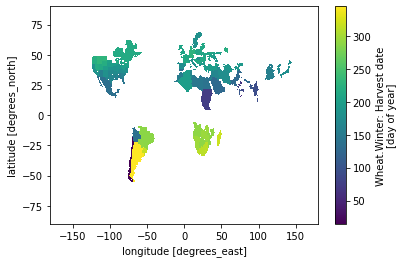

In [3]:
ds['harvest'].plot()

In [4]:
ds.coords

Coordinates:
  * latitude   (latitude) float64 89.75 89.25 88.75 ... -88.75 -89.25 -89.75
  * longitude  (longitude) float64 -179.7 -179.2 -178.7 ... 178.8 179.3 179.8

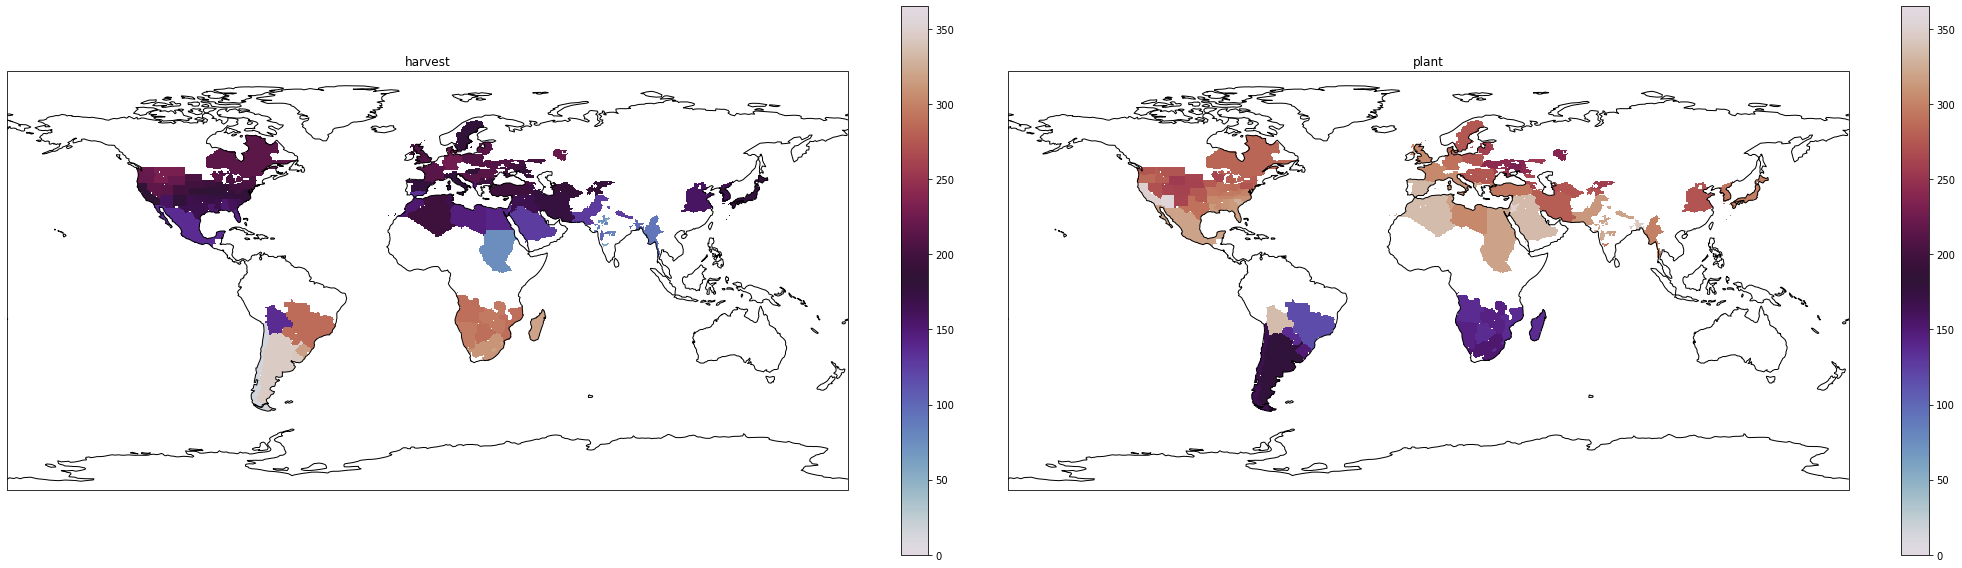

In [14]:
ncols = 2
nrows = 1
scale = 0.8
xs = 18 *scale
ys = 10 *scale
x_size = ncols * xs
y_size = nrows * ys
fig, axs = plt.subplots(ncols=ncols, nrows=nrows, subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(x_size, y_size))
fields = ['harvest', 'plant']
cmap = plt.get_cmap('twilight')
for i, field in enumerate(fields):
    y = ds.coords['latitude'].values
    x = ds.coords['longitude'].values
    z = ds[field].values
    ax = axs[i]
    ax.set_title(field)
    ax.coastlines()
    c = ax.pcolormesh(x, y, z, cmap=cmap, vmin=0,vmax=365)

    fig.colorbar(c, ax=ax)

fig.tight_layout()